In [107]:
#downloading libraries
import pandas as pd 
import numpy as np
import matplotlib as plt
import pandas as pd
import nltk
import re
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
from collections import Counter
import pickle
import matplotlib.dates
import datetime
from datetime import datetime
#nltk.download()

In [108]:
data=pd.read_csv('reddit-india-data.csv')
data

,flair,title,score,id,url,comms_num,body,author,comments,timestamp
0,AMA,I'm a Malayalee ABCD. Ask Me Anything.,1,cz98so,https://www.reddit.com/r/india/comments/cz98so...,42,I'm a Malayalee ABCD (American-Born Confused D...,simsim1000,Did you ever faced racism? \n\nAnd how is gir...,2019-09-04 08:34:35
1,AMA,What are some of the memorable posts of r/India??,85,cfj0kx,https://www.reddit.com/r/india/comments/cfj0kx...,67,As title suggests. Some posts are legends in R...,xxyyccb,Can't find it but some guy's mother posted he...,2019-07-20 20:37:58
2,AMA,Requesting AMA by Residents of Jammu & Kashmir.,4,crofzs,https://www.reddit.com/r/india/comments/crofzs...,18,"If there is any Residents of Jammu & Kashmir, ...",namanjha29,"On here, the accounts claiming to be Kashmir ...",2019-08-18 06:06:03
3,AMA,"Friends, Indians, countrymen, I cleared UPSC C...",1859,ba1o59,https://www.reddit.com/r/india/comments/ba1o59...,404,I am also super happy as I got the rank which ...,pseudoliberandu,Congrats. My neighbour aunty wants to know ab...,2019-04-06 20:14:18
4,AMA,So this happened yesterday [R],609,bcz7em,https://imgur.com/DJXElBz,77,NaN,High24x7,the fact that they are acknowledging the prob...,2019-04-14 17:57:08
5,AMA,Congress social media head Divya Spandana dele...,78,bw5y0q,https://www.thehindu.com/news/national/congres...,16,NaN,harddisc,IIRC she was on reddit and didnt answer much....,2019-06-03 16:44:45
6,AMA,How magician like Karan Singh do such magics? ...,6,c92763,https://www.reddit.com/r/india/comments/c92763...,11,NaN,MrGogi61,Sleight of hand and practice. Would you like ...,2019-07-05 02:17:17
7,AMA,[Question] Has anyone here tried Paytm First?,5,cja9s9,https://www.reddit.com/r/india/comments/cja9s9...,1,I am thinking of buying Paytm First- does anyo...,shantanusri,Someone here did an AMA recently.,2019-07-30 01:28:04
8,AMA,AMA Request: A Kashmiri Pandit over 30 years old.,71,cnhzlf,https://www.reddit.com/r/india/comments/cnhzlf...,74,"Now that 370 and 35A have been abolished, a fe...",contraryview,I know one but he's 20. I'll try to contact h...,2019-08-08 20:23:43
9,AMA,I was searching for something and I stumbled u...,332,cd3xmx,https://i.imgur.com/FefhpHc.jpg,108,NaN,SPYDER94,"Such a secular paper. Sorry, 10/10 or no AMA ...",2019-07-15 04:29:40


In [109]:
def data_getter(data,f,to_get):
    flair_data=[]
    for i in range(len(data)):
        if data['flair'][i] ==f:
            flair_data.append(data[to_get][i])
    return(flair_data)
def date_spec(data,f):
    flair_data=[]
    for i in range(len(data)):
        if data['flair'][i] ==f:
            datetime_object = datetime.strptime(data['timestamp'][i], '%Y-%m-%d %H:%M:%S')
            dates = matplotlib.dates.date2num( datetime_object)
            flair_data.append(dates)
    return(flair_data)
        

In [110]:
ama_comms=data_getter(data,'AMA','comms_num')
ask_comms=data_getter(data,'AskIndia','comms_num')
bus_comms=data_getter(data,'Business/Finance','comms_num')
food_comms=data_getter(data,'Food','comms_num')
npol_comms=data_getter(data,'Non-Political','comms_num')
photo_comms=data_getter(data,'Photography','comms_num')
policy_comms=data_getter(data,'Policy/Economy','comms_num')
pol_comms=data_getter(data,'Politics','comms_num')
sc_comms=data_getter(data,'Science/Technology','comms_num')
sports_comms=data_getter(data,'Sports','comms_num')
red_comms=data_getter(data,'[R]eddiquette','comms_num')

In [111]:
ama_score=data_getter(data,'AMA','score')
ask_score=data_getter(data,'AskIndia','score')
bus_score=data_getter(data,'Business/Finance','score')
food_score=data_getter(data,'Food','comms_num')
npol_score=data_getter(data,'Non-Political','score')
photo_score=data_getter(data,'Photography','score')
policy_score=data_getter(data,'Policy/Economy','score')
pol_score=data_getter(data,'Politics','score')
sc_score=data_getter(data,'Science/Technology','score')
sports_score=data_getter(data,'Sports','score')
red_score=data_getter(data,'[R]eddiquette','score')

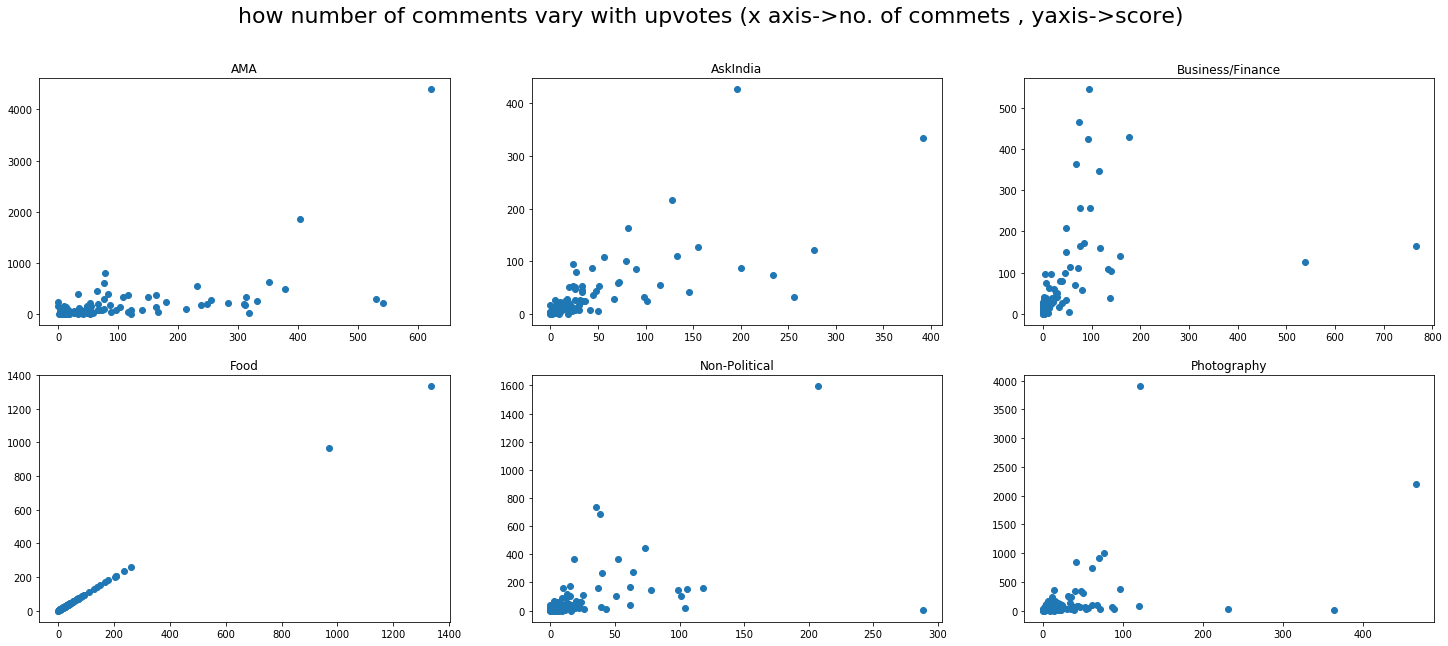

In [112]:
fig1=plt.figure(figsize=(25,10))
fig1.suptitle('how number of comments vary with upvotes (x axis->no. of commets , yaxis->score) ', fontsize =22)
p1=fig1.add_subplot(231)
p1.set_title('AMA')
p1.scatter(ama_comms,ama_score)

p2=fig1.add_subplot(232)
p2.set_title('AskIndia')
p2.scatter(ask_comms,ask_score)

p3=fig1.add_subplot(233)
p3.set_title('Business/Finance')
p3.scatter(bus_comms,bus_score)

p4=fig1.add_subplot(234)
p4.set_title('Food')
p4.scatter(food_comms,food_score)

p5=fig1.add_subplot(235)
p5.set_title('Non-Political')
p5.scatter(npol_comms,npol_score)

p6=fig1.add_subplot(236)
p6.set_title('Photography')
p6.scatter(photo_comms,photo_score)

fig1.savefig('comm_score1.png')

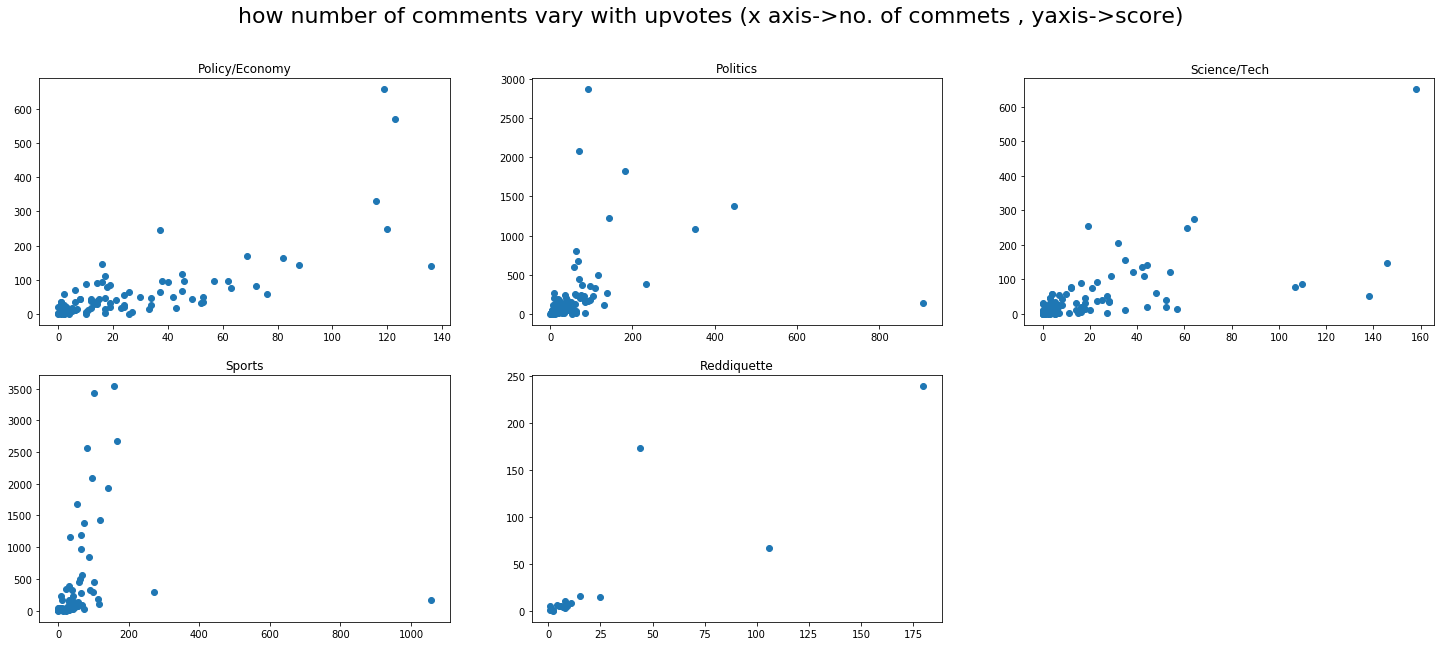

In [113]:
fig2=plt.figure(figsize=(25,10))
fig2.suptitle('how number of comments vary with upvotes (x axis->no. of commets , yaxis->score) ', fontsize =22)
p7=fig2.add_subplot(231)
p7.set_title('Policy/Economy')
p7.scatter(policy_comms,policy_score)

p8=fig2.add_subplot(232)
p8.set_title('Politics')
p8.scatter(pol_comms,pol_score)

p9=fig2.add_subplot(233)
p9.set_title('Science/Tech')
p9.scatter(sc_comms,sc_score)

p10=fig2.add_subplot(234)
p10.set_title('Sports')
p10.scatter(sports_comms,sports_score)

p11=fig2.add_subplot(235)
p11.set_title('Reddiquette')
p11.scatter(red_comms,red_score)


fig2.savefig('comm_score2.png')

In [114]:
ama_date=date_spec(data,'AMA')
ask_date=date_spec(data,'AskIndia')
bus_date=date_spec(data,'Business/Finance')
food_date=date_spec(data,'Food')
npol_date=date_spec(data,'Non-Political')
photo_date=date_spec(data,'Photography')
policy_date=date_spec(data,'Policy/Economy')
pol_date=date_spec(data,'Politics')
sc_date=date_spec(data,'Science/Technology')
sports_date=date_spec(data,'Sports')
red_date=date_spec(data,'[R]eddiquette')

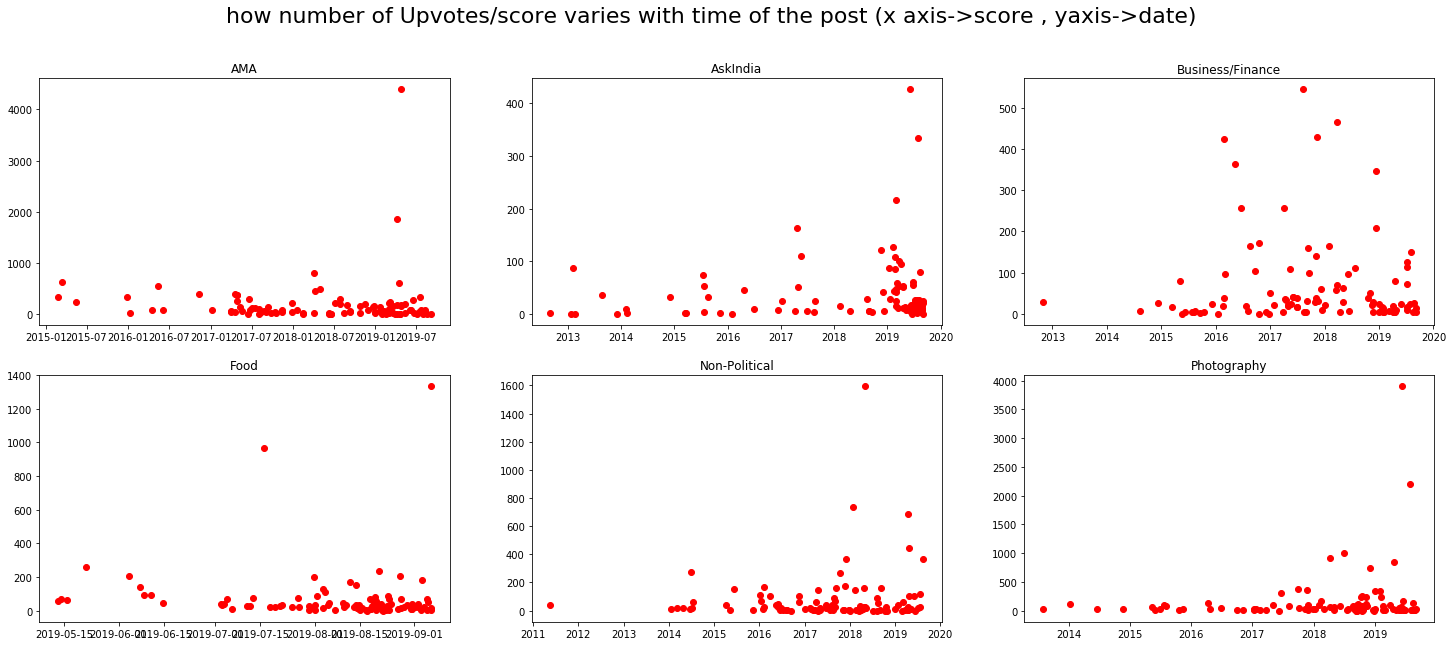

In [127]:
fig1=plt.figure(figsize=(25,10))
fig1.suptitle('how number of Upvotes/score varies with time of the post (x axis->score , yaxis->date) ', fontsize =22)
p1=fig1.add_subplot(231)
p1.set_title('AMA')
p1.plot_date(ama_date,ama_score,'ro')

p2=fig1.add_subplot(232)
p2.set_title('AskIndia')
p2.plot_date(ask_date,ask_score,'ro')

p3=fig1.add_subplot(233)
p3.set_title('Business/Finance')
p3.plot_date(bus_date,bus_score,'ro')

p4=fig1.add_subplot(234)
p4.set_title('Food')
p4.plot_date(food_date,food_score,'ro')

p5=fig1.add_subplot(235)
p5.set_title('Non-Political')
p5.plot_date(npol_date,npol_score,'ro')

p6=fig1.add_subplot(236)
p6.set_title('Photography')
p6.plot_date(photo_date,photo_score,'ro')

fig1.savefig('score_date1.png')

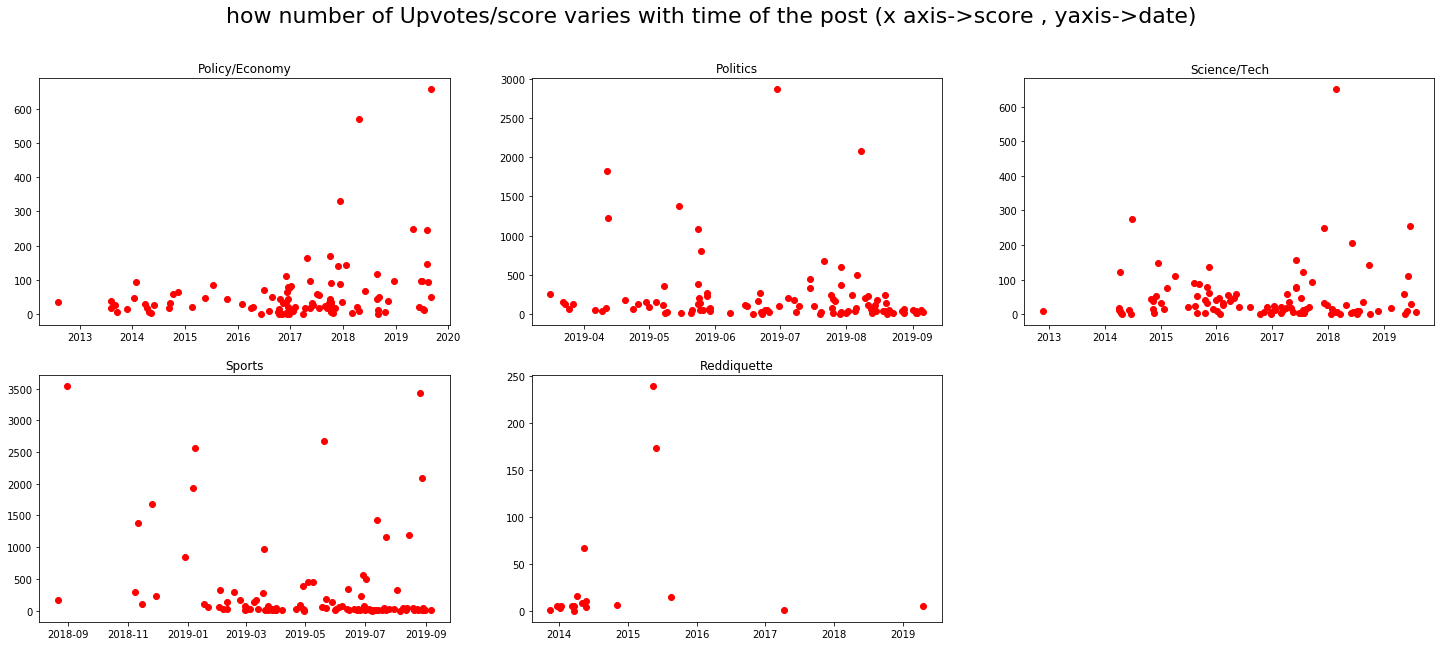

In [129]:
fig2=plt.figure(figsize=(25,10))
fig2.suptitle('how number of Upvotes/score varies with time of the post (x axis->score , yaxis->date) ', fontsize =22)
p7=fig2.add_subplot(231)
p7.set_title('Policy/Economy')
p7.plot_date(policy_date,policy_score,'ro')

p8=fig2.add_subplot(232)
p8.set_title('Politics')
p8.plot_date(pol_date,pol_score,'ro')

p9=fig2.add_subplot(233)
p9.set_title('Science/Tech')
p9.plot_date(sc_date,sc_score,'ro')

p10=fig2.add_subplot(234)
p10.set_title('Sports')
p10.plot_date(sports_date,sports_score,'ro')

p11=fig2.add_subplot(235)
p11.set_title('Reddiquette')
p11.plot_date(red_date,red_score,'ro')


fig2.savefig('score_date2.png')

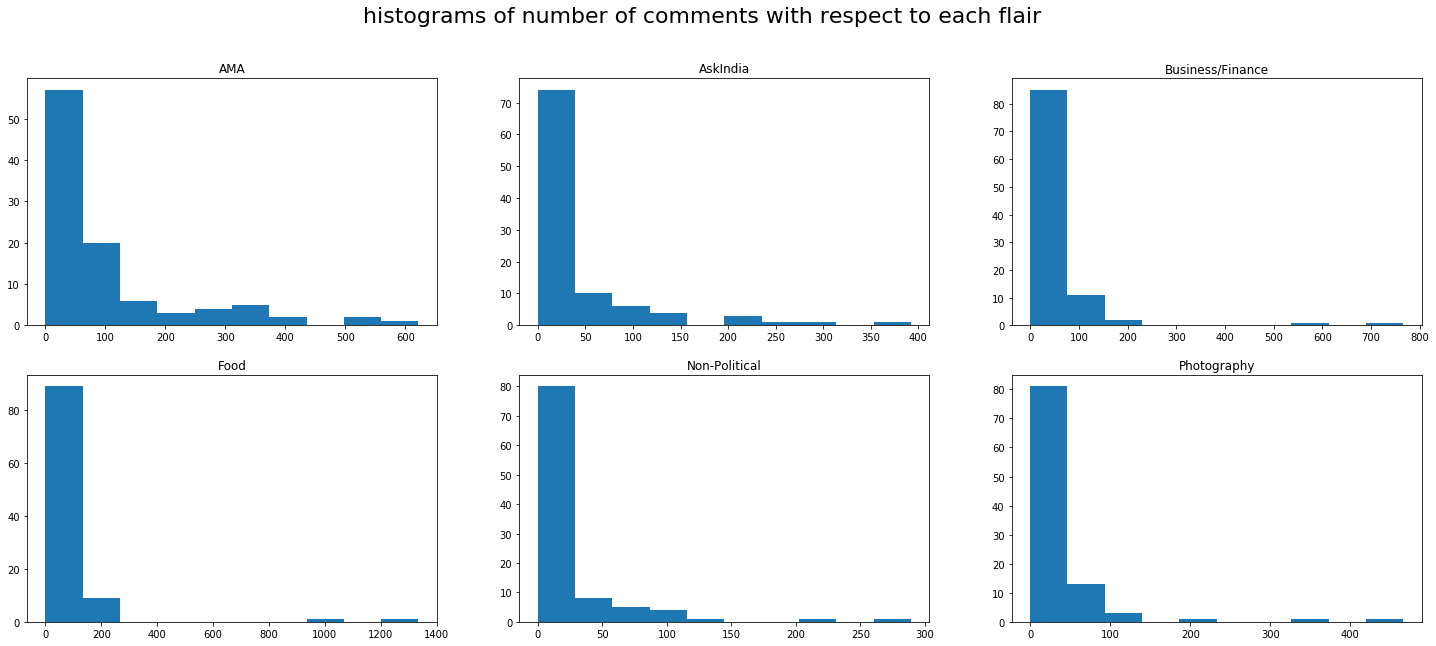

In [130]:
fig1=plt.figure(figsize=(25,10))
fig1.suptitle('histograms of number of comments with respect to each flair', fontsize =22)
p1=fig1.add_subplot(231)
p1.set_title('AMA')
p1.hist(ama_comms)

p2=fig1.add_subplot(232)
p2.set_title('AskIndia')
p2.hist(ask_comms)

p3=fig1.add_subplot(233)
p3.set_title('Business/Finance')
p3.hist(bus_comms)

p4=fig1.add_subplot(234)
p4.set_title('Food')
p4.hist(food_comms)

p5=fig1.add_subplot(235)
p5.set_title('Non-Political')
p5.hist(npol_comms)

p6=fig1.add_subplot(236)
p6.set_title('Photography')
p6.hist(photo_comms)

fig1.savefig('comm_hist1.png')

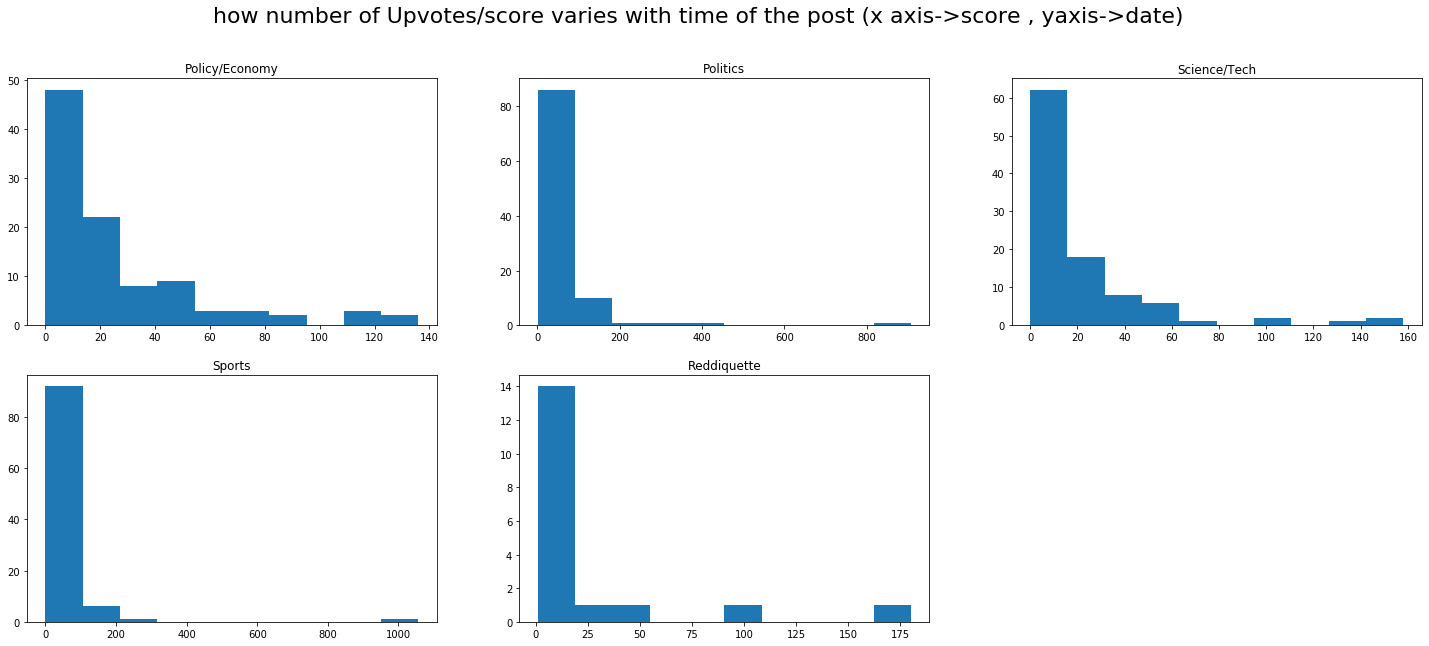

In [131]:
fig2=plt.figure(figsize=(25,10))
fig2.suptitle('how number of Upvotes/score varies with time of the post (x axis->score , yaxis->date) ', fontsize =22)
p7=fig2.add_subplot(231)
p7.set_title('Policy/Economy')
p7.hist(policy_comms)

p8=fig2.add_subplot(232)
p8.set_title('Politics')
p8.hist(pol_comms)

p9=fig2.add_subplot(233)
p9.set_title('Science/Tech')
p9.hist(sc_comms)

p10=fig2.add_subplot(234)
p10.set_title('Sports')
p10.hist(sports_comms)

p11=fig2.add_subplot(235)
p11.set_title('Reddiquette')
p11.hist(red_comms)


fig2.savefig('comm_hist2.png')